In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arma import ARMA

In [2]:
def simulate_arma(phi=None,theta=None,sigma=1,simulations=100):
    if phi is None:
        phi = []
    if theta is None:
        theta = []
    phi = phi
    theta = [1] + theta
    Z = [np.random.normal(scale=sigma) for k in range(simulations+len(phi)+len(theta))]
    X = []
    for k in range(len(phi)):
        X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)])))
    for k in range(len(phi),simulations+len(phi)):
        X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)]))+sum(a*b for a,b in zip(phi,X[::-1][:len(phi)])))
    return np.array(X[len(phi):])

fitted coeffs: [[ 0.60204699]
 [ 0.08864444]
 [ 0.19001797]
 [ 0.02512123]]
fitted sigma^2: [[ 0.25493222]]


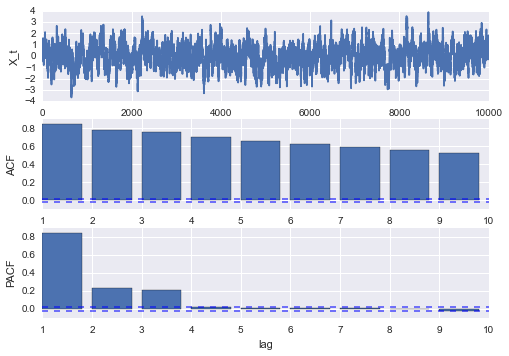

In [3]:
#simulating an AR process and fit an AR model

#select parameters
phi_ar = [0.6,0.1,0.2]
theta_ar = []
ar_order = 4
n_simulations = 10000
acf_print_limit = 10
sigma =  0.5

#simulate AR process
simulated_ar = simulate_arma(phi=phi_ar,theta=theta_ar,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_ar)
plt.ylabel('X_t')

#fit AR model
ar_model = ARMA(simulated_ar)

plt.subplot(3,1,2)
ar_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ar_model.plot_PACF(limit=acf_print_limit)

ar_model.fit_ar(ar_order)

print('fitted coeffs:',ar_model.coefs)
print('fitted sigma^2:',ar_model.sigma)

phi: [array([ 0.60773542]), array([ 0.58607923,  0.03563424]), array([ 0.57724588, -0.10964855,  0.24788935]), array([ 0.57339369, -0.10794462,  0.23891897,  0.01553996])]
nu: [ 0.26292563  0.26259177  0.24645573  0.24639622]


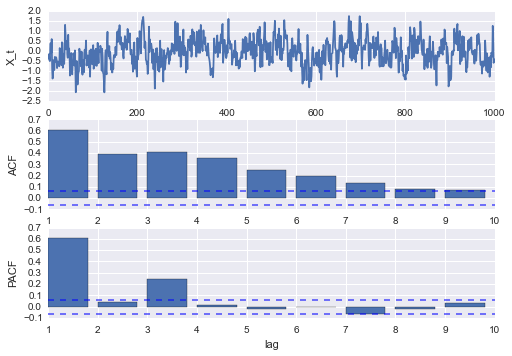

/Users/lrichter/anaconda/envs/Python34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


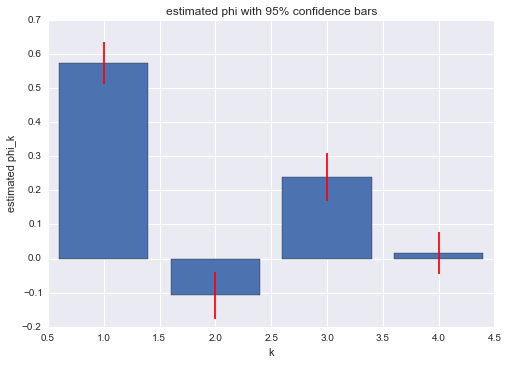

In [4]:
#simulating an AR process and fit an AR model using the durbin levinson algorithm

#select parameters
phi_ar = [0.6,-0.1,0.2]
theta_ar = []
ar_order = 4
n_simulations = 1000
acf_print_limit = 10
sigma =  0.5

#simulate AR process
simulated_ar = simulate_arma(phi=phi_ar,theta=theta_ar,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_ar)
plt.ylabel('X_t')

#fit AR model
ar_model = ARMA(simulated_ar)

plt.subplot(3,1,2)
ar_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ar_model.plot_PACF(limit=acf_print_limit)

ar_model.fit_ar_durbin_levinson(ar_order)

print('phi:',ar_model.phi)
print('nu:',ar_model.nu)

plt.show()

plt.bar(list(range(1,ar_order+1)),ar_model.phi[ar_order-1],align='center',yerr = ar_model.get_confidence_interval_ar_d_l(ar_order),ecolor='red')
plt.xlabel('k')
plt.ylabel('estimated phi_k')
plt.title('estimated phi with 95% confidence bars')
plt.show()

theta: [array([0.4712023229217171], dtype=object), array([0.52147424634759809, 0.13903126078018452], dtype=object), array([0.54121980837603134, 0.079030916150528124, 0.16457412012127703], dtype=object), array([0.56828053838582371, 0.074652596830381529, 0.18766439165730617,
       0.039425015898792305], dtype=object)]
nu: [ 1.38865262  1.08032782  1.06803103  1.03144741  1.00939666]


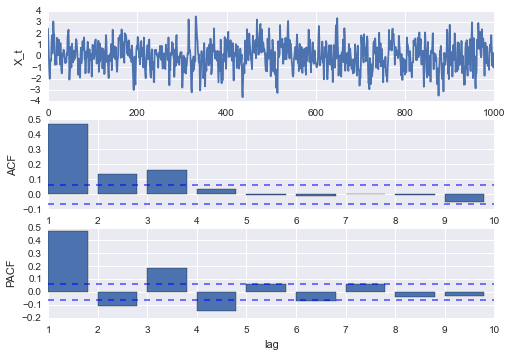

/Users/lrichter/anaconda/envs/Python34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


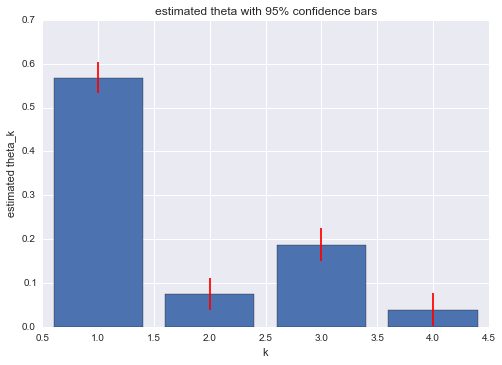

In [22]:
#simulating an MA process and fit an MA model using the durbin levinson algorithm

#select parameters
phi_ma = []
theta_ma = [0.6,0.1,0.2]
ma_order = 4
n_simulations = 1000
acf_print_limit = 10
sigma =  1

#simulate AM process
simulated_ma = simulate_arma(phi=phi_ma,theta=theta_ma,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_ma)
plt.ylabel('X_t')

#fit AR model
ma_model = ARMA(simulated_ma)

plt.subplot(3,1,2)
ma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ma_model.plot_PACF(limit=acf_print_limit)

ma_model.fit_ma_durbin_levinson(ma_order)

print('theta:',ma_model.theta_ma)
print('nu:',ma_model.nu_ma)

plt.show()

plt.bar(list(range(1,ma_order+1)),ma_model.theta_ma[ma_order-1],align='center',yerr = ma_model.get_confidence_interval_ma_d_l(ma_order),ecolor='red')
plt.xlabel('k')
plt.ylabel('estimated theta_k')
plt.title('estimated theta with 95% confidence bars')
plt.show()

phi: [[ 0.80327857]
 [ 0.10338265]]
theta: [[[ 0.47280683]]]
sigma^2: 1.01167863407


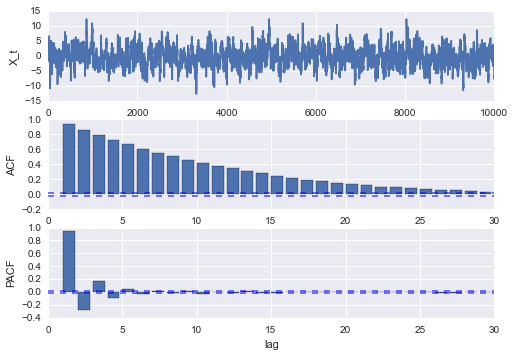

In [26]:
#simulating an ARMA process and fit an ARMA model using the durbin levinson algorithm

#select parameters
phi_arma = [0.7,0.2]
theta_arma = [0.6]
ar_order = 2
ma_order = 1
m = 10
n_simulations = 10000
acf_print_limit = 30
sigma =  1

#simulate AM process
simulated_arma = simulate_arma(phi=phi_arma,theta=theta_arma,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_arma)
plt.ylabel('X_t')

#fit AR model
arma_model = ARMA(simulated_arma)

plt.subplot(3,1,2)
arma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
arma_model.plot_PACF(limit=acf_print_limit)

arma_model.fit_arma_preliminary(ar_order,ma_order,m)

print('phi:',arma_model.phi)
print('theta:',arma_model.theta)
print('sigma^2:',arma_model.nu_ma[m])